In [1]:
import tensorflow as tf
import pickle
from keras.preprocessing import image
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import os
import numpy as np
from sklearn.model_selection import train_test_split
import cv2 as cv
from tensorflow.python.client import device_lib


In [2]:
device_lib.list_local_devices()

2022-03-31 17:05:01.012264: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-31 17:05:01.053646: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-31 17:05:01.066168: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusolver.so.11'; dlerror: libcusolver.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/karol/.local/lib/python3.9/site-packages/cv2/../../lib64:
2022-03-31 17:05:01.068593: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please 

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 16215036499514860811
 xla_global_id: -1]

In [4]:
pickle_in = open("/home/karol/model_training_data/X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("/home/karol/model_training_data/y.pickle","rb")
y = pickle.load(pickle_in)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
X_train = X_train/255
X_test = X_test/255

In [6]:
print(y_train.shape)

(7200, 1)


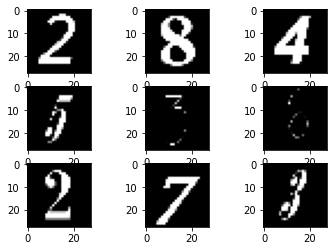

In [7]:
plt.figure()
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [8]:
IMG_SHAPE = X_train.shape[1:]

In [9]:
model = models.Sequential()
model.add(layers.Conv2D(128, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=IMG_SHAPE))
model.add(layers.Conv2D(256, (2, 1), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 128)       1280      
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 26, 256)       65792     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 13, 256)      0         
 )                                                               
                                                                 
Total params: 67,072
Trainable params: 67,072
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(9))

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=12, 
                    validation_data=(X_test,y_test))

Epoch 1/35
225/225 [==============================] - 4s 9ms/step - loss: 0.2463 - accuracy: 0.9258 - val_loss: 0.1018 - val_accuracy: 0.9694
Epoch 2/35
225/225 [==============================] - 2s 9ms/step - loss: 0.0472 - accuracy: 0.9867 - val_loss: 0.0585 - val_accuracy: 0.9817
Epoch 3/35
225/225 [==============================] - 2s 8ms/step - loss: 0.0200 - accuracy: 0.9946 - val_loss: 0.0647 - val_accuracy: 0.9811
Epoch 4/35
225/225 [==============================] - 2s 8ms/step - loss: 0.0100 - accuracy: 0.9982 - val_loss: 0.0533 - val_accuracy: 0.9800
Epoch 5/35
225/225 [==============================] - 2s 9ms/step - loss: 0.0087 - accuracy: 0.9985 - val_loss: 0.0220 - val_accuracy: 0.9922
Epoch 6/35
225/225 [==============================] - 2s 8ms/step - loss: 9.0566e-04 - accuracy: 0.9999 - val_loss: 0.0207 - val_accuracy: 0.9928
Epoch 7/35
225/225 [==============================] - 2s 8ms/step - loss: 3.6230e-04 - accuracy: 1.0000 - val_loss: 0.0230 - val_accuracy: 0.992

In [13]:
model.save("model.h5")

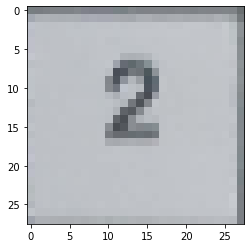

In [14]:
test_image = cv.imread("Box.png")
test_image = cv.resize(test_image,(28,28))
plt.figure()
plt.imshow(test_image)
plt.show()

In [15]:
test_image = np.expand_dims(test_image, axis=0)
np.argmax(model.predict(test_image))

ValueError: in user code:

    File "/home/karol/.local/lib/python3.8/site-packages/keras/engine/training.py", line 1801, in predict_function  *
        return step_function(self, iterator)
    File "/home/karol/.local/lib/python3.8/site-packages/keras/engine/training.py", line 1790, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/karol/.local/lib/python3.8/site-packages/keras/engine/training.py", line 1783, in run_step  **
        outputs = model.predict_step(data)
    File "/home/karol/.local/lib/python3.8/site-packages/keras/engine/training.py", line 1751, in predict_step
        return self(x, training=False)
    File "/home/karol/.local/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/karol/.local/lib/python3.8/site-packages/keras/engine/input_spec.py", line 248, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential" (type Sequential).
    
    Input 0 of layer "conv2d" is incompatible with the layer: expected axis -1 of input shape to have value 1, but received input with shape (None, 28, 28, 3)
    
    Call arguments received:
      • inputs=tf.Tensor(shape=(None, 28, 28, 3), dtype=uint8)
      • training=False
      • mask=None
